In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Download the data set of cats and dogs using wget 
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-08-02 05:53:33--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.128, 172.217.194.128, 2404:6800:4003:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  18.5MB/s    in 3.5s    

2020-08-02 05:53:38 (18.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Unzip the downloaded zip file
import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Image Augmentation using options in the ImageDataGenetor Object

from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen_augmented = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,        # rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures
      width_shift_range=0.3,    # width_shift is a range (fraction of total width) within  which the picture is  horizontally translated
      height_shift_range=0.3,   # height_shift is a range (fraction of total heigth) within  which the picture is  vertically translated
      shear_range=0.3,          # shear_range is for randomly applying shearing transformations.
      zoom_range=0.3,           # zoom_range is for randomly zooming inside pictures
      horizontal_flip=True,     # Horizontal_flip is for randomly flipping half of the images horizontally.
      fill_mode='nearest' )     # strategy used for filling in newly created pixels

In [ ]:
# Building a train generator
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255.0) # rescale images 

training_images_path = '/tmp/cats_and_dogs_filtered/train'

train_generator = train_datagen.flow_from_directory(
    training_images_path, 
    target_size=(150, 150), # resize images to 150 x 150
    batch_size = 30, 
    class_mode='binary' # This is a binary classifier cats and dogs
)
"""

Found 2000 images belonging to 2 classes.


In [ ]:
# Build a training generator using ImageDataGenetor Object with Augmentation options


training_images_path = '/tmp/cats_and_dogs_filtered/train'

train_generator_augmented = train_datagen_augmented.flow_from_directory(
    training_images_path, 
    target_size=(150, 150), # resize images to 150 x 150
    batch_size = 30, 
    class_mode='binary' # This is a binary classifier cats and dogs
)

Found 2000 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1/255.0) # rescale images 

validation_images_path = '/tmp/cats_and_dogs_filtered/validation'

validation_generator = validation_datagen.flow_from_directory(
    validation_images_path, 
    target_size=(150, 150), # resize images to 150 x 150
    batch_size = 30, 
    class_mode='binary' # This is a binary classifier cats and dogs
)

Found 1000 images belonging to 2 classes.


In [ ]:
# Build a deep learning CNN having 4 Convulational layers and 1 dense layer

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# compile the model

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
# Fitting the model and saving the output of each epoch in an object named " history"

history = model.fit(
      train_generator_augmented,
      steps_per_epoch=67,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=34,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
67/67 - 19s - loss: 0.6946 - accuracy: 0.5195 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/100
67/67 - 18s - loss: 0.6908 - accuracy: 0.5275 - val_loss: 0.6913 - val_accuracy: 0.5200
Epoch 3/100
67/67 - 19s - loss: 0.6923 - accuracy: 0.4985 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 4/100
67/67 - 19s - loss: 0.6929 - accuracy: 0.5040 - val_loss: 0.6918 - val_accuracy: 0.5190
Epoch 5/100
67/67 - 19s - loss: 0.6890 - accuracy: 0.5365 - val_loss: 0.6868 - val_accuracy: 0.5500
Epoch 6/100
67/67 - 19s - loss: 0.6863 - accuracy: 0.5505 - val_loss: 0.6676 - val_accuracy: 0.5800
Epoch 7/100
67/67 - 19s - loss: 0.6792 - accuracy: 0.5475 - val_loss: 0.6778 - val_accuracy: 0.5510
Epoch 8/100
67/67 - 19s - loss: 0.6780 - accuracy: 0.5445 - val_loss: 0.6739 - val_accuracy: 0.5490
Epoch 9/100
67/67 - 19s - loss: 0.6654 - accuracy: 0.5740 - val_loss: 0.6731 - val_accuracy: 0.5320
Epoch 10/100
67/67 - 19s - loss: 0.6548 - accuracy: 0.5950 - val_loss: 0.6310 - val_accuracy: 0.6210

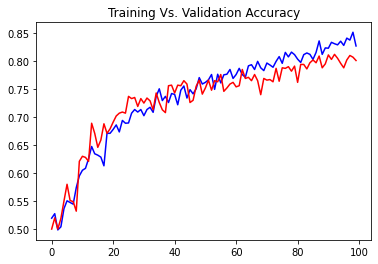

In [ ]:
# Plot the loss and accuracy using the history object

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(0,100)

# Plot training vs validation accuracy

plt.plot(epochs,acc,'b',label = 'Training accuracy')
plt.plot(epochs,val_acc,'r',label = 'Validation accuracy')
plt.title("Training Vs. Validation Accuracy")
plt.show()




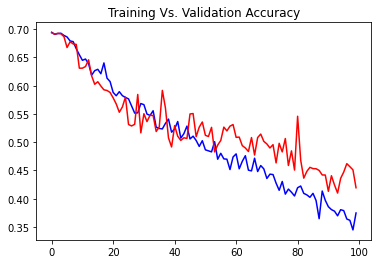

In [ ]:
# Plot Training vs. Validation loss


plt.plot(epochs,loss,'b',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title("Training Vs. Validation Accuracy")
plt.show()


As seen above the training and validation curves for both accuracy and loss are tracking each other closely. The overfitting problem was been alleviated using Augmentation. 
